**The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

In [ ]:
tf.keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Load Data**

The dataset that we will work it is the MNIST dataset, a dataset of handwritten digits 0-9.

Our first step is to load the data and divide it into a training and testing dataset. The MNIST dataset can be downloaded directly from TensorFlow and has already been divided. Run the next cell to import the data.

x_train  is the dataset of 28x28 images of handwritten digits that the model will be trained on.

y_train is the dataset of labels that correspond to x_train.

x_test is the dataset of 28x28 images of handwritten digits that the model will be tested on.

y_test is the dataset of labels that correspond to x_test

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


*From this, we can derive that we have 60.000 samples - of 28 x 28 pixels. As the number of image channels is not present, we can assume that it's 1 *

Specifically, they expect it as follows: (x_shape, y_shape, channels). We already have x_shape and y_shape, which are both 28. We don't have channels yet, but do know about its value: 1. By consequence, our value for input_shape will be (28, 28, 1)!

In [ ]:
sns.countplot(y_train)

In [ ]:
np.isnan(x_train).any()

In [ ]:
np.isnan(x_test).any()

**Prepare the data**

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)


**2.3 Normalization and Reshaping** (SCaling image)

Since the values in our x_train dataset are 28x28 images, our input shape must be specified so that our model will know what is being inputed.

The first convolution layer expects a single 60000x28x28x1 tensor instead of 60000 28x28x1 tensors.

Models generally run better on normalized values. The best way to normalize the data depends on each individual dataset. For the MNIST dataset, we want each value to be between 0.0 and 1.0. As all values originally fall under the 0.0-255.0 range, divide by 255.0.

Run the following cell to define the input_shape and to normalize and reshape the data.



In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

**# Make sure images have shape (28, 28, 1)**

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**2.4 Label Encoding**

# The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

For example, 2 becomes [0,0,1,0,0,0,0,0,0,0] and 7 becomes [0,0,0,0,0,0,0,1,0,0].

Run the following cell to transform the labels into one-hot encodings

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

**2.5 Visualize Data**

Run the following cell to visualize an image in our datas 

In [ ]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

**The image is an image of a handwritten 5. The one-hot encoding holds the value of 5.**

**Build the Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Explanation of the working of each layer in the CNN model:

layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3).

layer 3 is again a Conv2D layer which is also used to convolve the image and is using 64 filters each of size (3*3). 

layer 2 is the MaxPooling2D layer which picks the max value out of a matrix of size (3*3). 

layer4 is showing Dropout at a rate of 0.5. 

layer5 is flattening the output obtained from layer4 and this flattens output is passed to layer6.

layer 6 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

**Train the model**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.1,
                    verbose=0,
                    validation_data=(x_test,y_test),
                    callbacks=[callbacks])

Epoch 1/5
422/422 - 40s - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.0305 - val_accuracy: 0.9922 - 40s/epoch - 96ms/step
Epoch 2/5
422/422 - 42s - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0299 - val_accuracy: 0.9920 - 42s/epoch - 98ms/step
Epoch 3/5
422/422 - 41s - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0288 - val_accuracy: 0.9912 - 41s/epoch - 96ms/step
Epoch 4/5
422/422 - 42s - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0297 - val_accuracy: 0.9918 - 42s/epoch - 100ms/step
Epoch 5/5
422/422 - 40s - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0305 - val_accuracy: 0.9917 - 40s/epoch - 94ms/step


**[Evaluate the Model]** 

4.1 Loss and Accuracy Curves

Run the following cell to evaluate the loss and accuracy of our model.

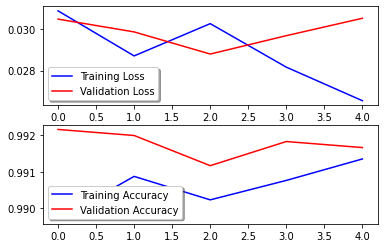

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Predict Result**

In [ ]:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0269 - accuracy: 0.9904
Test loss: 0.026923546567559242
Test accuracy: 0.9904000163078308


**Making Prediction**

In [ ]:
pred=model.predict(x_test)
#printing the first element from predicted data
print(pred[0])
#printing the index of 
print('Index:',np.argmax(pred[0]))

[3.4867004e-10 7.7302791e-12 6.1891893e-07 7.4719338e-07 1.9775552e-13
 2.3089711e-11 1.9744446e-18 9.9999845e-01 6.1344743e-09 1.9204873e-07]
Index: 7


So the predict function is giving is the probability values of all 10 labels and the label with the highest probability is the final prediction. In our case, we got the label at the 7th index as the prediction.

In [ ]:
y_classes = [np.argmax(element) for element in pred]
print('Predicted_values:',y_classes[:10])
print('Actual_values:',y_test[:10])

Predicted_values: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Actual_values: tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(10, 10), dtype=float32)
